In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import pickle
grad=pickle.load(open( "2_path_grad.p", "rb" ) )
XX=pickle.load(open( "2_path.p", "rb" ) )

In [14]:
func=[]
F = open("2_func","r")
for line in F: 
    fields=line.split()
    func.append(fields[0])

In [23]:
func = np.asarray(func,dtype=np.float)
lr=XX[...,0].reshape(40)
print(func)


[24.07943278 24.03879384 23.98805052 24.07378339 23.91316834 24.20823049
 24.24625347 24.27736616 24.19800262 24.28613167 24.18289429 24.23563588
 24.15843263 24.21942899 24.02685593 23.59124193 23.64770476 23.77777101
 23.93415576 23.98538874 23.98668454 23.88784946 23.81014124 23.66063927
 23.25312462 23.05463765 22.61870431 22.34456433 21.40187216 21.25291247
 35.19984458 35.52424067 35.1959968  35.28530352 35.49596764 35.17157156
 35.17157156 35.41181726 35.22800528 35.28432665]


In [51]:
from scipy import linalg as LA
G_norm=np.apply_along_axis(LA.norm,1,grad)
print(G_norm.shape)

(41,)


In [32]:
print(XX[...,0]*1000)
print(lr.shape)
print(func.shape)
print(len(lr))
print(len(func))
kk=range(0,34)
print(kk)

[  1.           1.22876408   1.37534518   1.20369513   1.38880636
   0.89248864   0.74970507   0.74970507   0.78033841   0.73775332
   0.86980246   0.87714179   0.87801693   0.87801693   1.26859705
   2.16680511   2.04512043   1.9666814    1.4637683    1.46633958
   1.46431561   1.67088237   1.83482267   1.95314458   3.05582534
   3.34755735   4.25533642   4.85300252   6.57101151   6.69243539
 -11.48867108 -11.48867108 -11.15287101 -10.78951545 -10.53136978
 -10.30544243 -10.06052475 -10.06052475 -10.06052475 -10.33530323]
(40,)
(40,)
40
40
range(0, 34)


In [53]:
df=pd.DataFrame({'x': range(1,41), 
                 'y1': lr*1000, 
                 'y2': func,
                 'y3': G_norm[0:40]*0.1 })

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


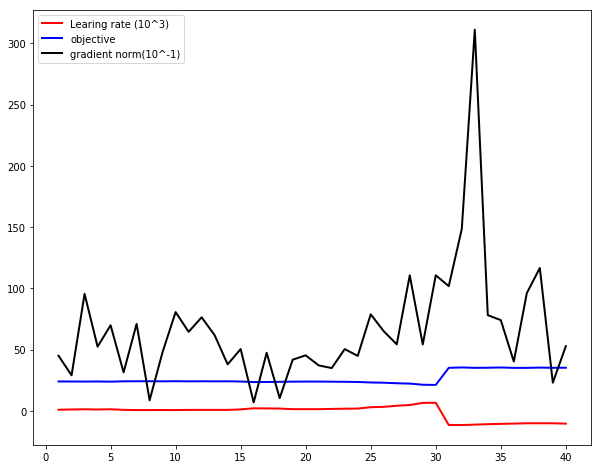

In [56]:
fig = plt.figure(figsize=(10,8))
plt.plot( 'x', 'y1', data=df, marker='', color='red', linewidth=2, label="Learning rate (10^3)")
plt.plot( 'x', 'y2', data=df, marker='', color='blue', linewidth=2, label="objective")
plt.plot( 'x', 'y3', data=df, marker='', color='black', linewidth=2, label="gradient norm(10^-1)")
plt.legend()
plt.show()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:3358: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


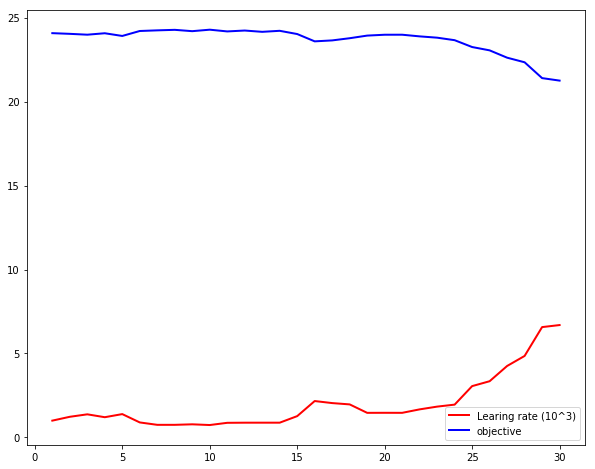

In [57]:
df2=pd.DataFrame({'x': range(1,31), 
                 'y1': lr[0:30]*1000, 
                 'y2': func[0:30]})
fig2 = plt.figure(figsize=(10,8))
plt.plot( 'x', 'y1', data=df2, marker='', color='red', linewidth=2, label="Learning rate (10^3)")
plt.plot( 'x', 'y2', data=df2, marker='', color='blue', linewidth=2, label="objective")
plt.legend()
plt.show()